**HR-Attrition Rate Analysis**

A company has reported that their there are some serious number of employee leaving the company. The management asked the data team, to figure out the root cause why there is such an attrition rate in the company and what the factors they should focus on to reduce the attrition rate.

**Import All the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
df=pd.read_csv('attrition.csv')

**EDA**



In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2,2,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4,1,3


In [ ]:
df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,3,3,4,1,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,2,3,4,4,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,3,4,1,3,3
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,10.0,2,9,7,8,2,3,4,1,3
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,Male,2,Laboratory Technician,...,NaN,6,21,3,9,4,3,1,3,3


In [ ]:
df.shape

(4410, 27)

There are 4410 rows and 27 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  Over18                   4410 non-null   object 
 14  PercentSalaryHike       

In [ ]:
df.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.724943,2.729025,2.760317
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.091770,1.100443,0.706008
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction     0
JobSatisfaction             0
WorkLifeBalance             0
dtype: int64

There are some missing values in column NumCompaniesWorked and TotalWorkingYears. However NumCompaniesWorked will be dropped from the data

In [ ]:
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].mode()[0], inplace=True)


Filling the missing values in column TotalWorkingYears with mode

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction     0
JobSatisfaction             0
WorkLifeBalance             0
dtype: int64

In [ ]:
df2=df.drop(['NumCompaniesWorked'], axis=1)
df2

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3,4,2
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2,2,1
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4,4,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,3,3,4,1,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,2,3,4,4,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,3,4,1,3,3
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,10.0,2,9,7,8,2,3,4,1,3


The NumCompaniesWorked column has been deleted from the data

In [ ]:
df2.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e22f6b590>,
      dtype=object)

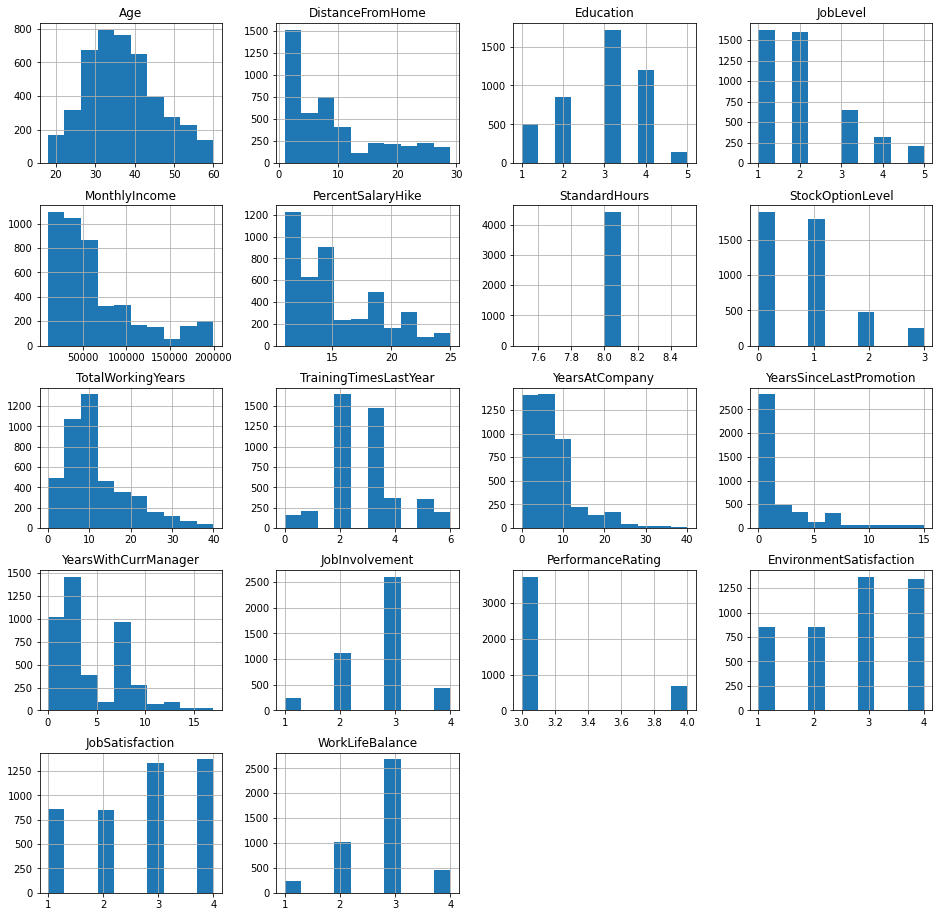

In [ ]:
df2.hist(figsize = (16,16))

There are some intersting findings from the histogram,
1. The employee's age is ranging from less than 20 years old to 60 years old. The majority of the employee however is 30 to 35 years old
2. The majority of employee have about 10 years of working experience
3. The majority of employee are paid less than 50,000 and the percentage of rise is less than 15%
4. The majority of employee have been working in the company for less or equal to 10 years
5. Job satisfaction level is high and very high ( above 1000 employee)





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


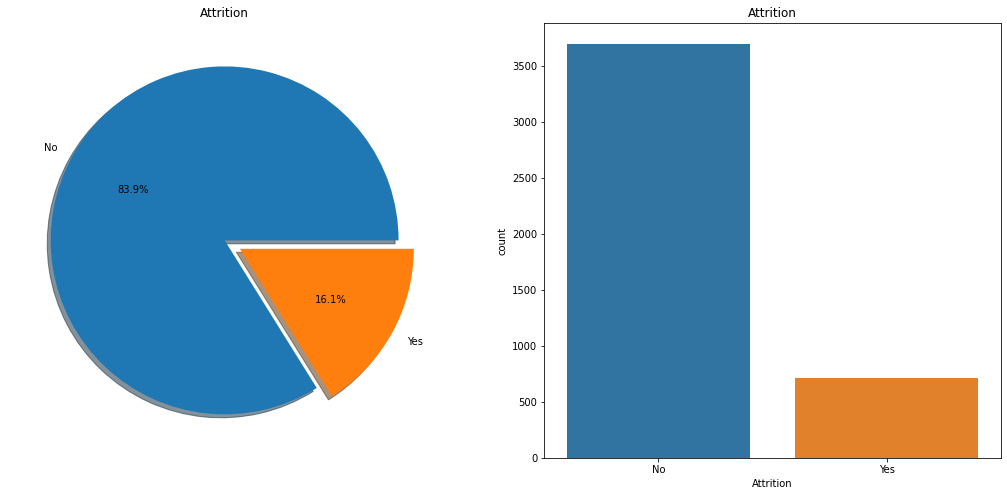

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df2['Attrition'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Attrition')
ax[0].set_ylabel('')
sns.countplot('Attrition',data=df2,ax=ax[1])
ax[1].set_title('Attrition')
plt.show()

From the pie chart we can see that the attrition rate is around 16 percent

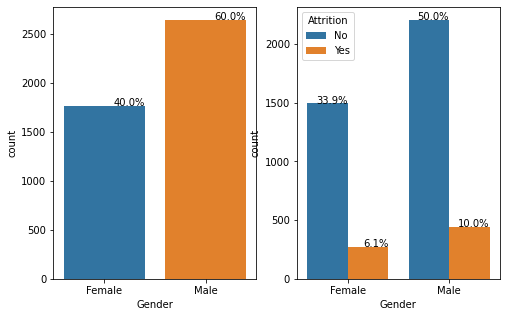

In [ ]:
plt.figure(figsize=(8,5))
total = float(len(df2))
plt.subplot(1,2,1)
ay=sns.countplot(x="Gender",data=df2)
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
plt.subplot(1,2,2)
ax = sns.countplot(x="Gender", hue="Attrition", data=df2)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

60% of employee are male and 10% contribution of attrition rate coming from male

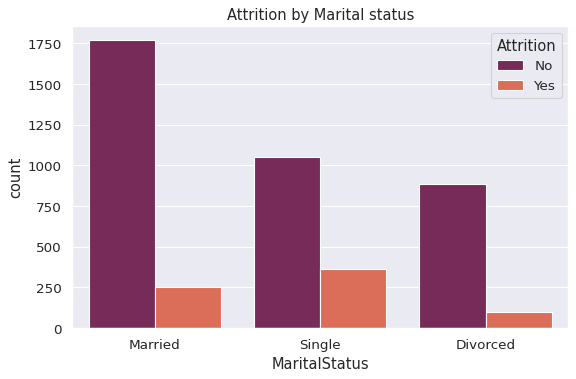

In [ ]:
plt.figure(figsize=(8,5), dpi=80)
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=df2, x='MaritalStatus', hue='Attrition', palette='rocket').set_title('Attrition by Marital status');


The number who leave the company are mostly single

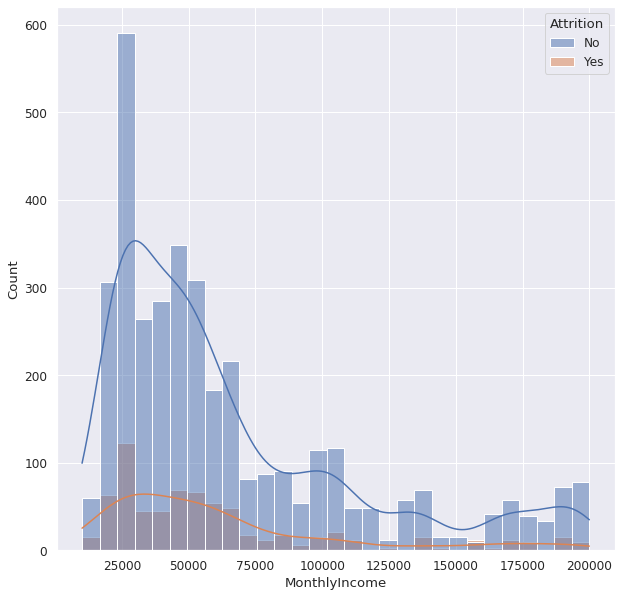

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'MonthlyIncome', hue = 'Attrition', data = df2 ,     kde=True )

Majority of employee who leave the company are getting paid around 25000

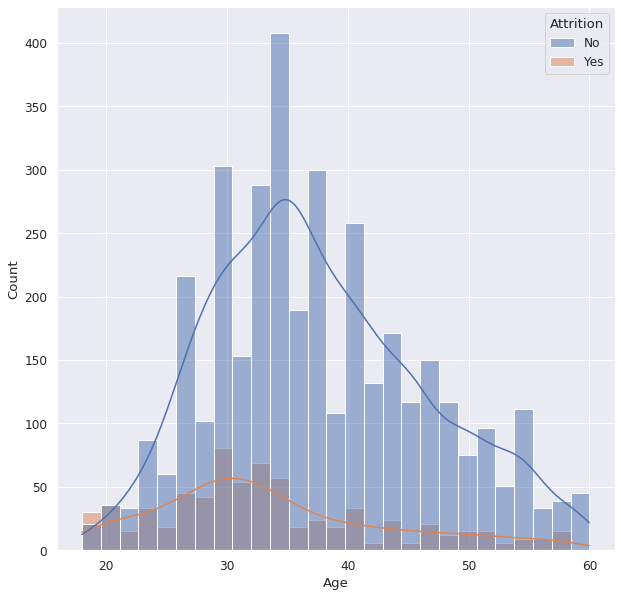

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'Age', hue = 'Attrition', data = df2,     kde=True )

Employee who leave the company are mostly around 30 years old

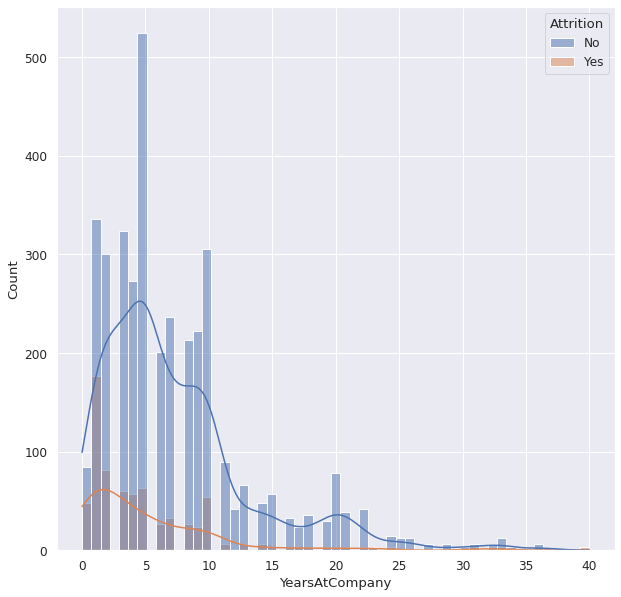

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'YearsAtCompany', hue = 'Attrition', data = df2,     kde=True)

And most of the employee who leave have only been working at the company for less than 5 years (around 2 years)

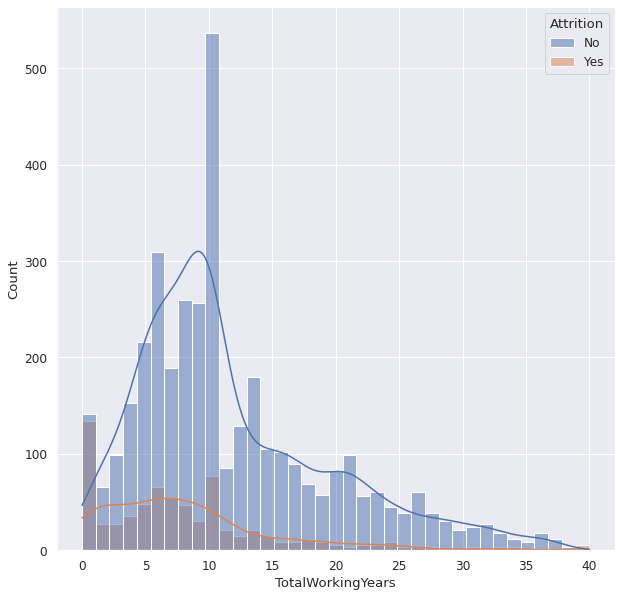

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'TotalWorkingYears', hue = 'Attrition', data = df2 ,     kde=True )

Most of employee who leave have 10 years of working expriance

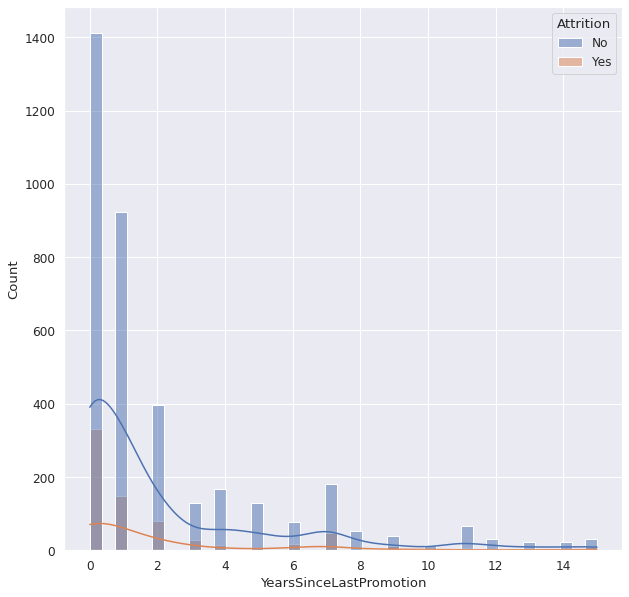

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'YearsSinceLastPromotion', hue = 'Attrition', data = df2 ,     kde=True )

What I found quite odd is that the highest number of employee who leave the company, just has been promoted recently

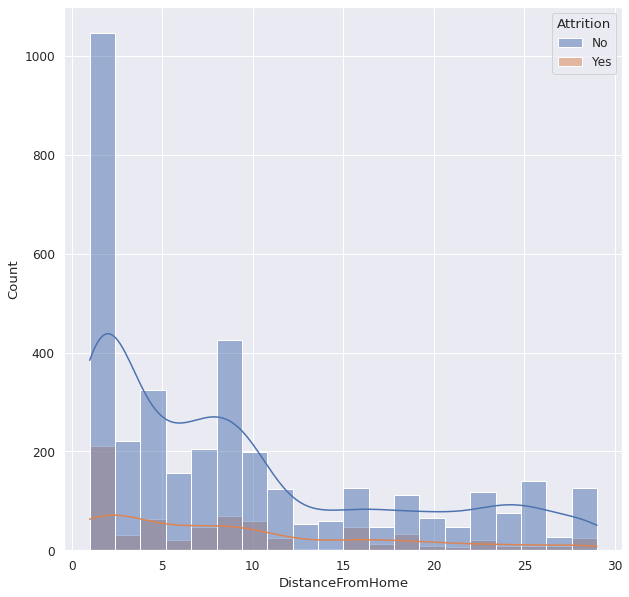

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'DistanceFromHome', hue = 'Attrition', data = df2 ,     kde=True )

It seems distance from home has no significant reason to why employee leave

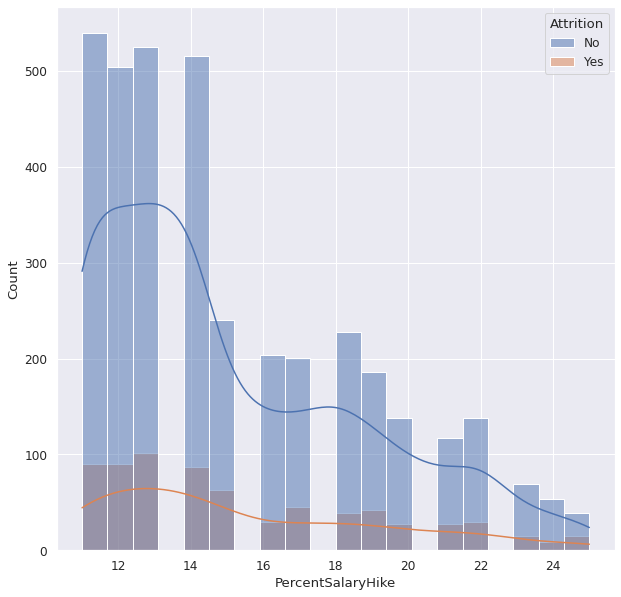

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'PercentSalaryHike', hue = 'Attrition', data = df2 ,     kde=True )

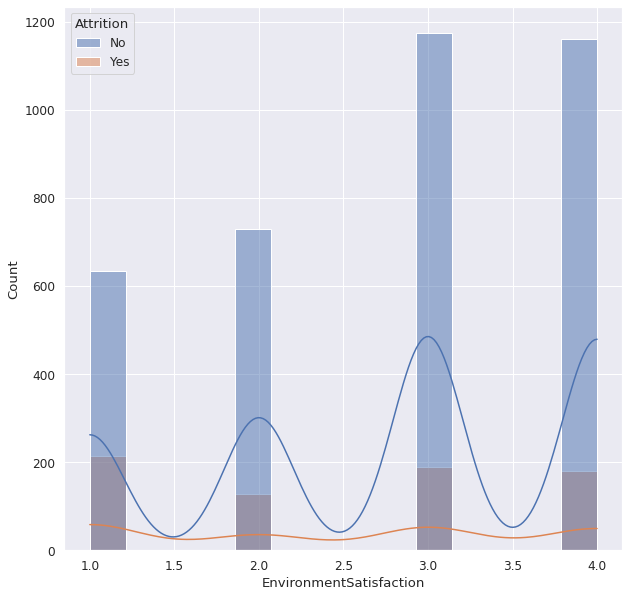

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'EnvironmentSatisfaction', hue = 'Attrition', data = df2 ,     kde=True )

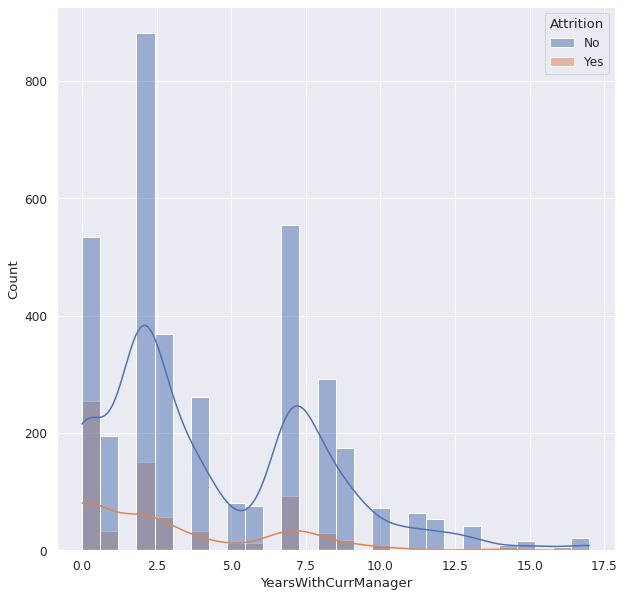

In [ ]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'YearsWithCurrManager', hue = 'Attrition', data = df2 ,     kde=True )

Employee who leave, mostly are those who just had rise around 12% to 13%. As we can see, higher the rise, lower the number of attrition

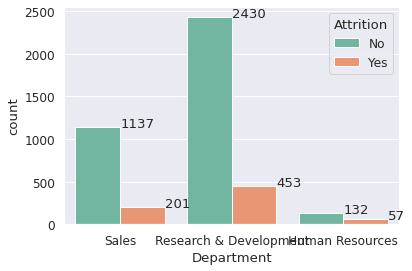

In [ ]:
u=sns.countplot(x= 'Department' ,data = df2 ,palette='Set2'  ,hue =df2['Attrition'])
for p in u.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    #u.annotate(percentage, (x, y),ha='left')
    u.annotate(y,(x,y),ha='left')
plt.show()

Employee who leave the company mostly coming from R&D, sales coming in second and only small amount of employee who leave the company are coming fro HR

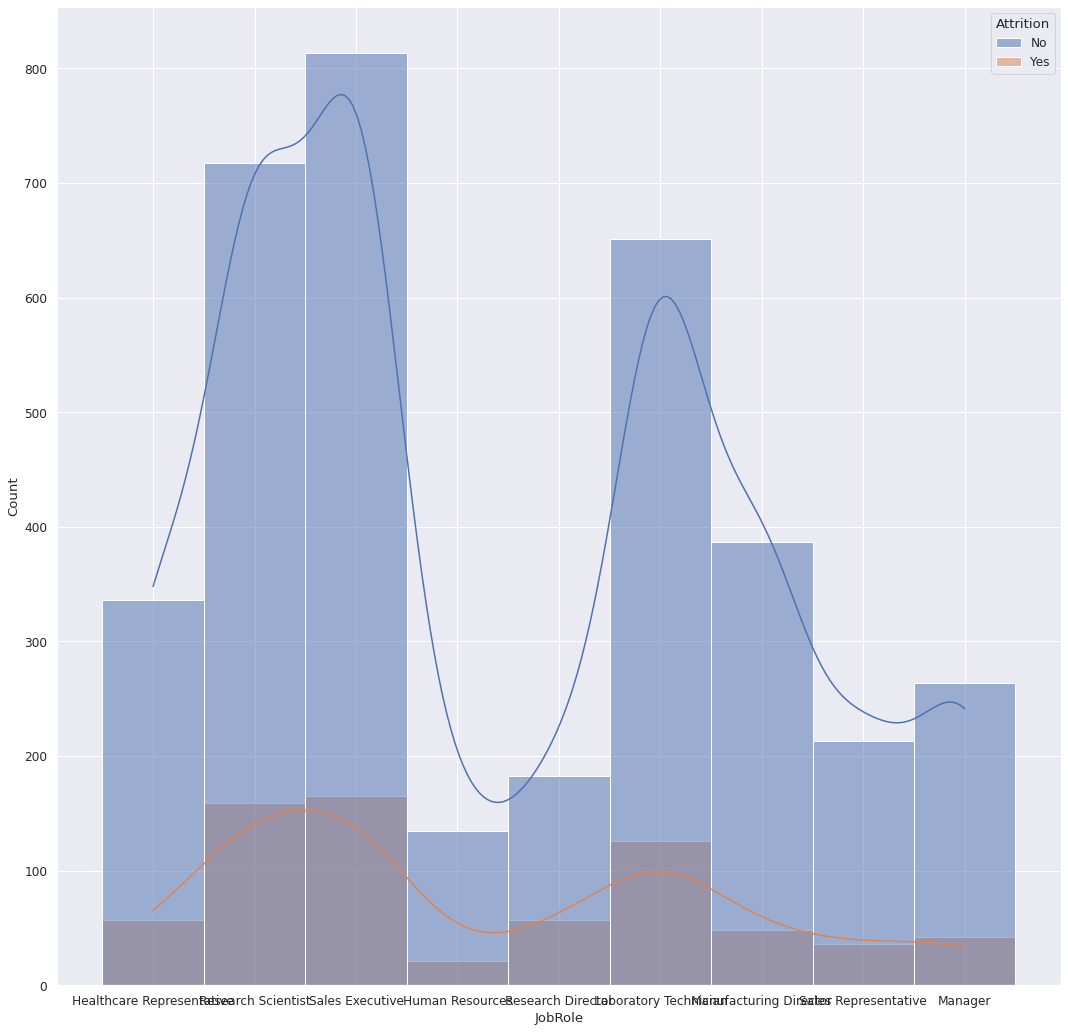

In [ ]:
plt.figure(figsize = (18,18))
sns.histplot(x ='JobRole', hue = 'Attrition', data = df2,     kde=True )

The top 3 job role who leave companies are
1. Sales executive
2. Research scientist
3. Laboratory technician

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

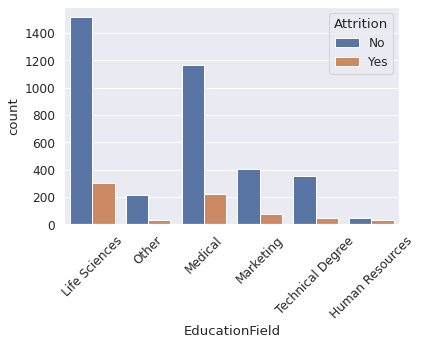

In [ ]:
sns.countplot(x='EducationField', hue='Attrition', data=df2);
plt.xticks(rotation=45)

And mostly their education background is in medical field

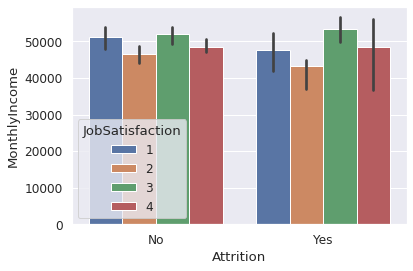

In [ ]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'JobSatisfaction',data=df2,estimator=median)# hue= Categorical variable , estimator- Statistical function to estimate within each categorical bin.
plt.show()

The number of people who are sattisfied with their job though for low level but choose to stay in the company, are getting more than 50000
on the other hand people whose job satisfaction in the low and medium and choose to leave are getting less than 50000.

Text(0.5, 1.0, 'Attrition VS. Monthly Income')

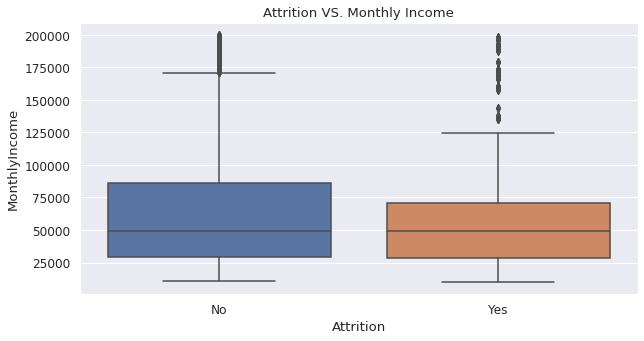

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df2['Attrition'],y=df2['MonthlyIncome'])
plt.title('Attrition VS. Monthly Income')

Employee who leave the company based on the boxplot are those who are getting less than 75000

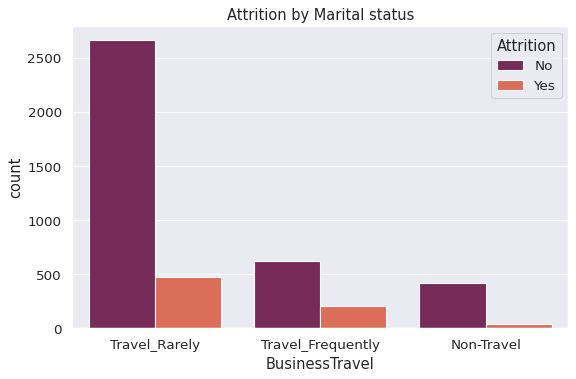

In [ ]:
plt.figure(figsize=(8,5), dpi=80)
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=df2, x='BusinessTravel', hue='Attrition', palette='rocket').set_title('Attrition by Marital status');

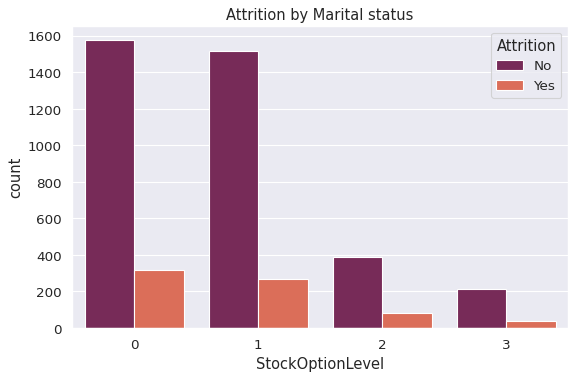

In [ ]:
plt.figure(figsize=(8,5), dpi=80)
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=df2, x='StockOptionLevel', hue='Attrition', palette='rocket').set_title('Attrition by Marital status');

Most of employee who leave the company are those who rarely do business travel. This suggest that those who leave mostly are those who are not getting enough business travel from their leaders

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

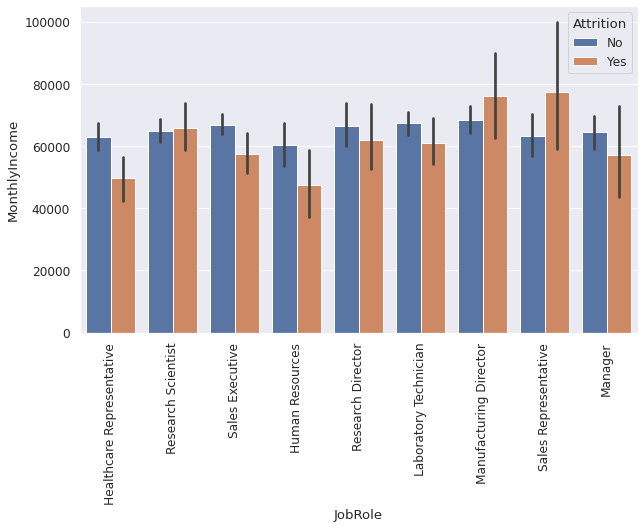

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df2)
plt.xticks(rotation=90)

Employee who leave the company that come from R&D are getting paid at around 60000 while sales executive are getting paid less than 60000

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

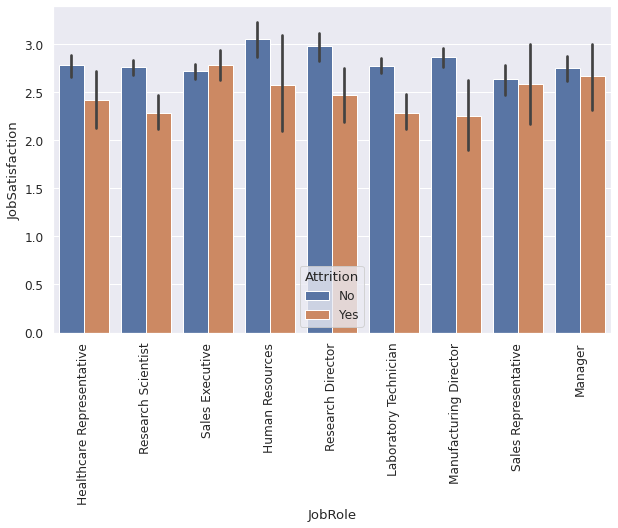

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='JobSatisfaction', hue='Attrition', data=df2)
plt.xticks(rotation=90)

Research Scientist and Lab Technician who leave have lower job satisfaction level

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

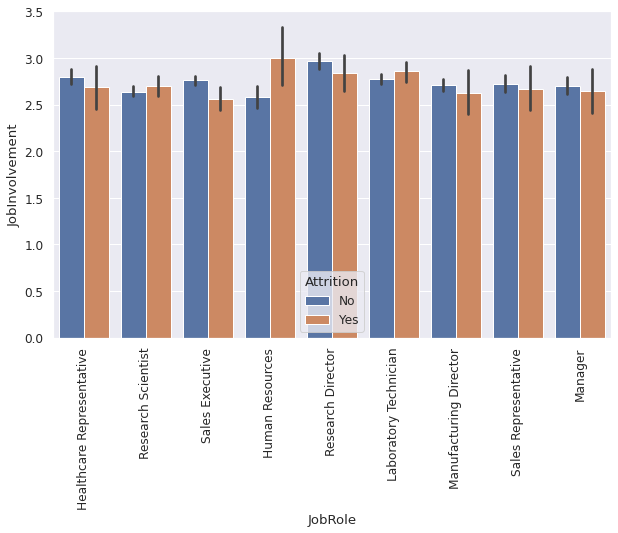

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='JobInvolvement', hue='Attrition', data=df2)
plt.xticks(rotation=90)

And those who leave coming from R&D have lower job involvment than those coming from other department

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

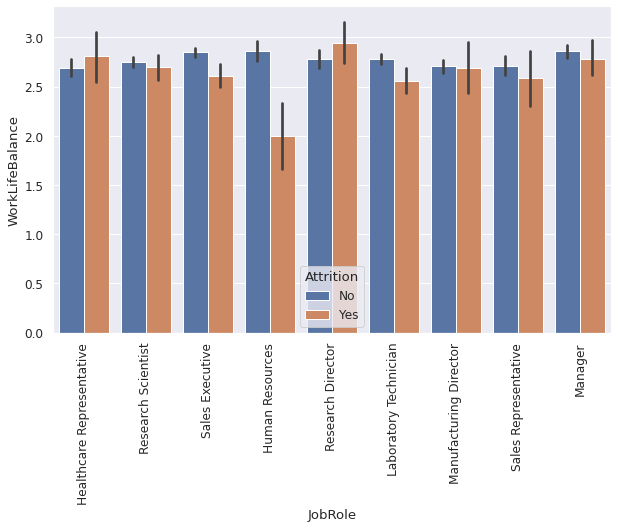

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='WorkLifeBalance', hue='Attrition', data=df2)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

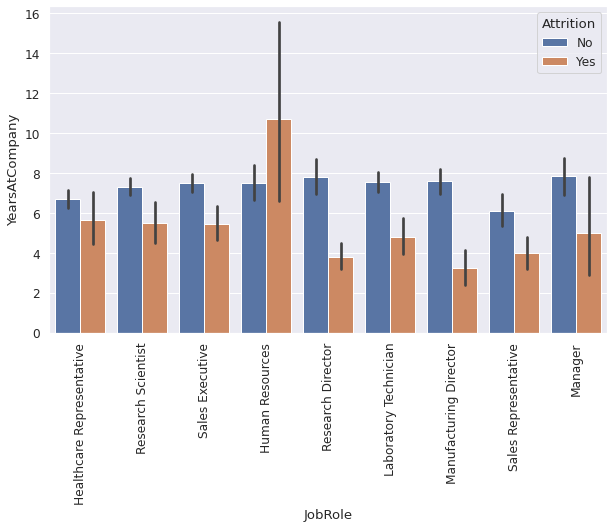

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='YearsAtCompany', hue='Attrition', data=df2)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

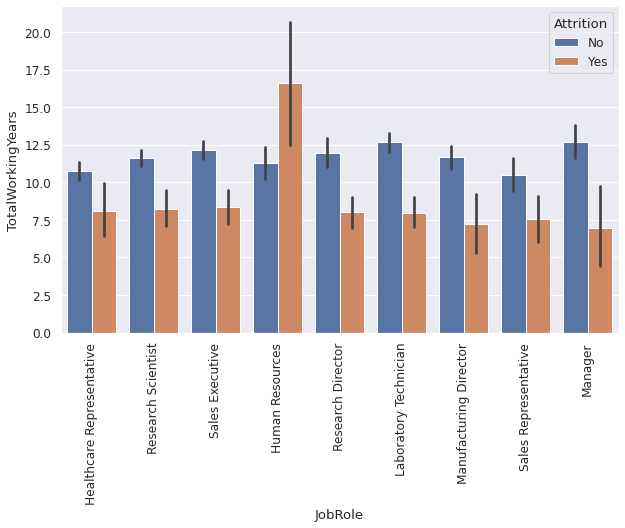

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='TotalWorkingYears', hue='Attrition', data=df2)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

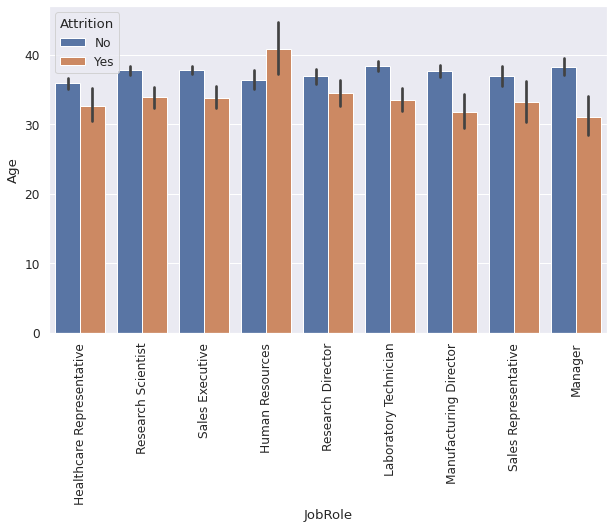

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='Age', hue='Attrition', data=df2)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

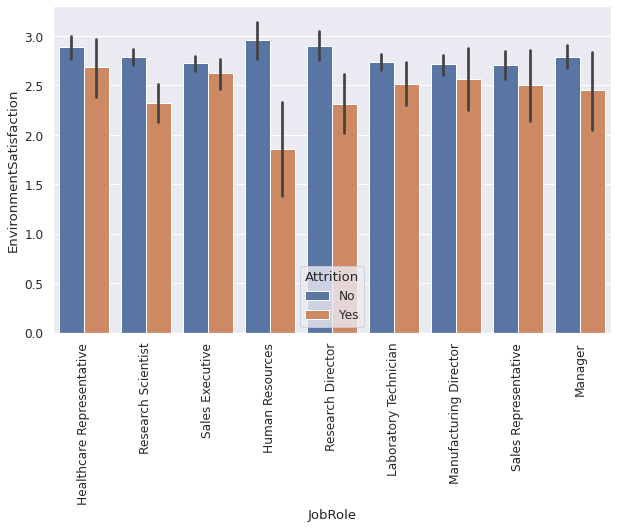

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='EnvironmentSatisfaction', hue='Attrition', data=df2)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

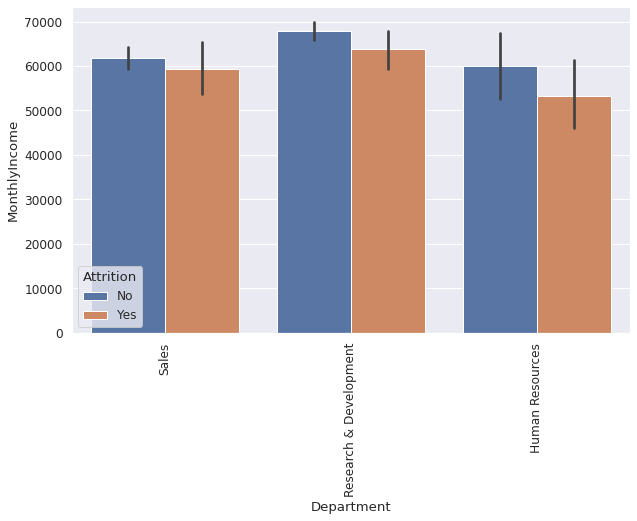

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Department', y='MonthlyIncome', hue='Attrition', data=df2)
plt.xticks(rotation=90)

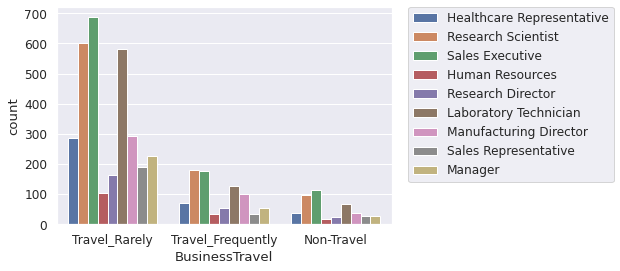

In [ ]:
sns.countplot(x='BusinessTravel', hue='JobRole', data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

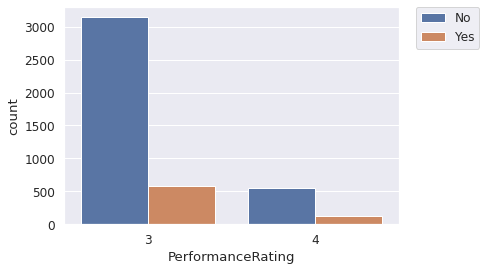

In [ ]:
sns.countplot(x='PerformanceRating', hue='Attrition', data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

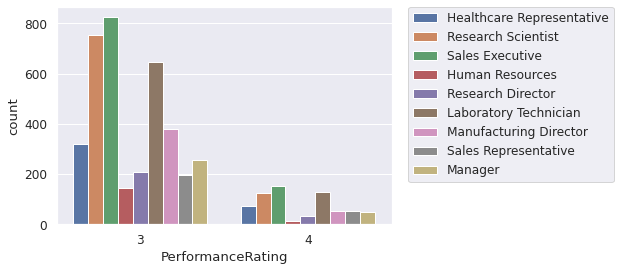

In [ ]:
sns.countplot(x='PerformanceRating', hue='JobRole', data=df2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

Text(0.5, 1.0, 'Jobrole VS. Percent Salary Hike')

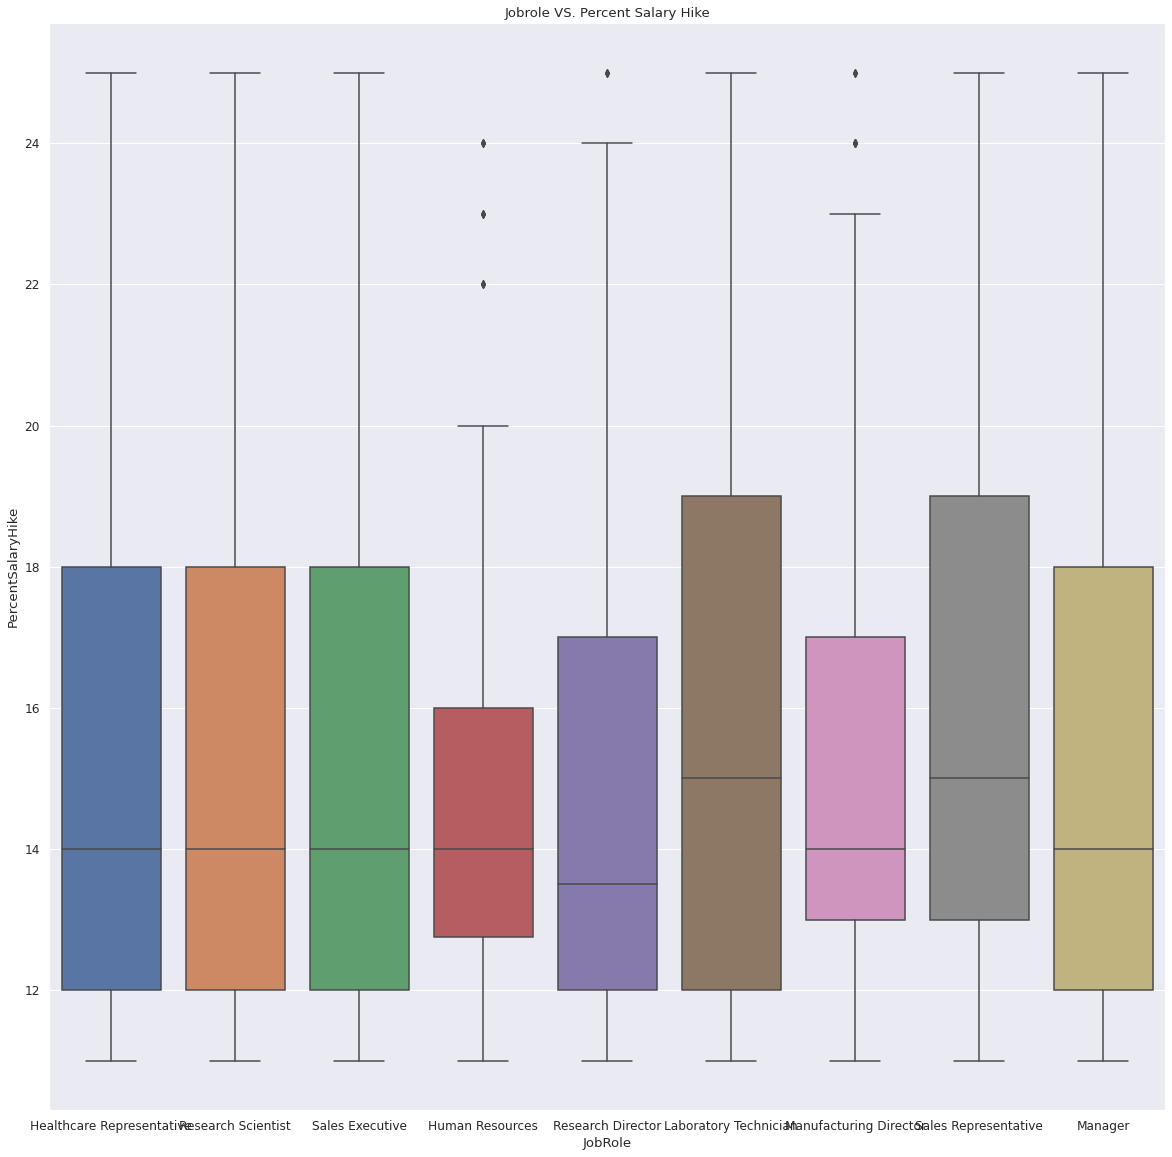

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(x=df2['JobRole'],y=df2['PercentSalaryHike'])
plt.title('Jobrole VS. Percent Salary Hike')

Text(0.5, 1.0, 'Jobrole VS. Percent Salary Hike')

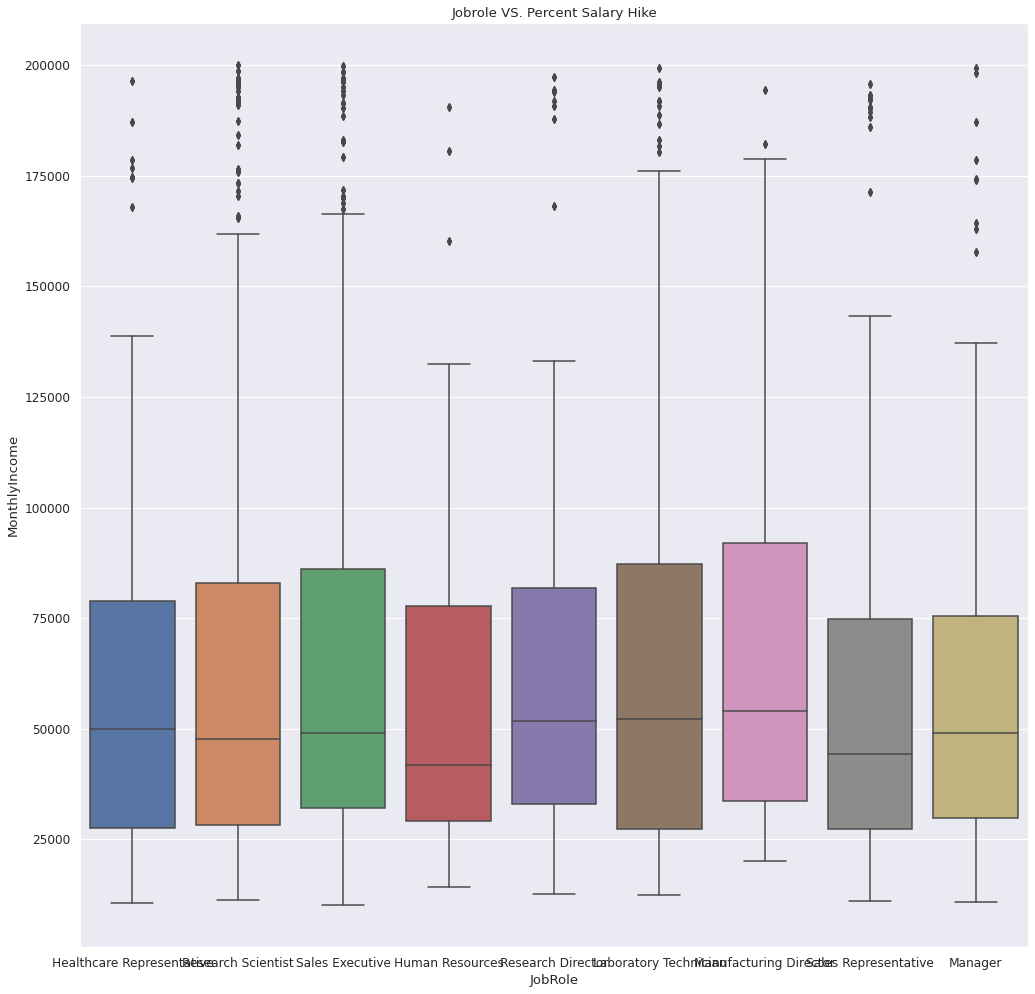

In [ ]:
plt.figure(figsize=(17,17))
sns.boxplot(x=df2['JobRole'],y=df2['MonthlyIncome'])
plt.title('Jobrole VS. Percent Salary Hike')

Text(0.5, 1.0, 'Department VS. Monthly Income')

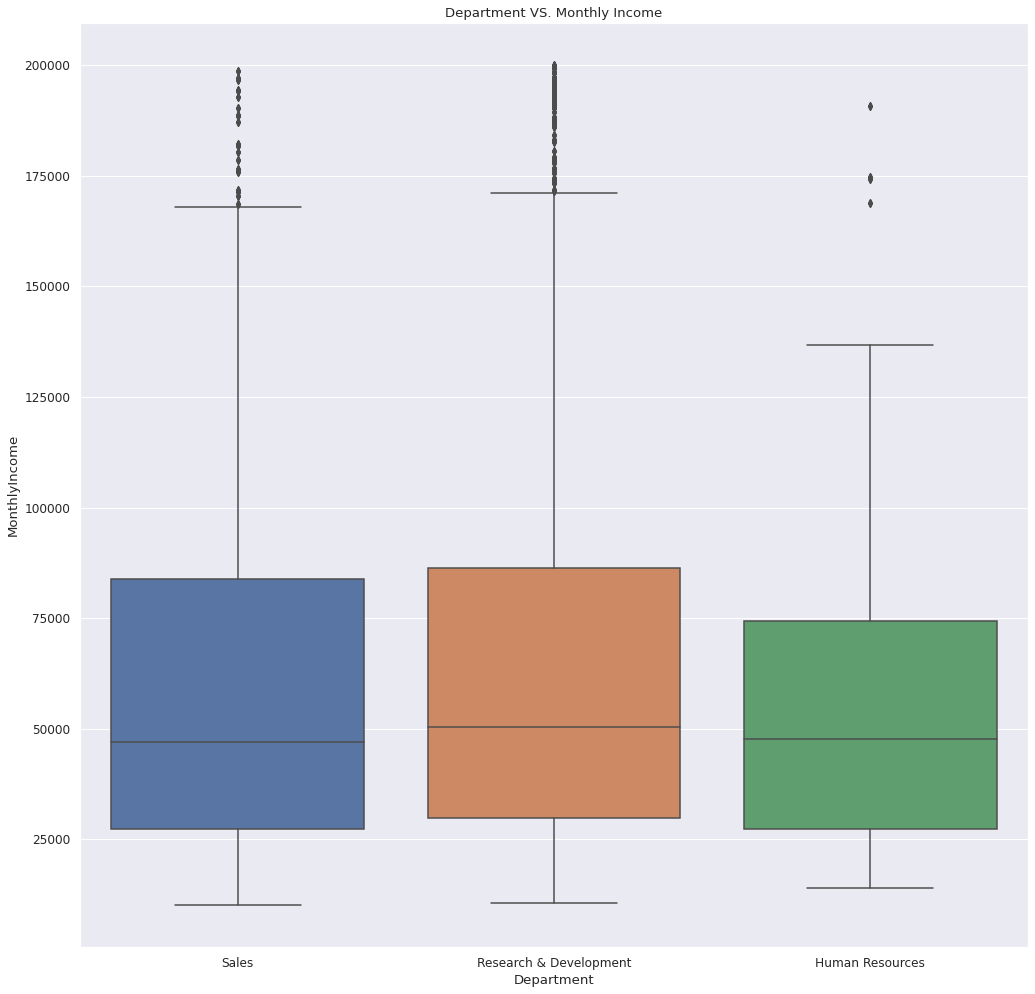

In [ ]:
plt.figure(figsize=(17,17))
sns.boxplot(x=df2['Department'],y=df2['MonthlyIncome'])
plt.title('Department VS. Monthly Income')